# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
recordedcity= []
temp = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
wind = []

n = 1
# Running in loop for all the cities recorded
for city in cities:
    # building query url
    parameters = {'q': city, 'appid': api_key, "units": "metric", 'lang': 'es'}
    response = requests.get(url, params = parameters).json()
    # Exracting info from response
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        recordedcity.append(response['name'])
        #datetext.append(response['list']['dt_txt'])
        humidity.append(response['main']['humidity'])
        maxtemp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])   
        # Printing response
        print(f"Processing Record {n} of {len(cities)} | {city}")
        #creating lag to avoid blocking of API key
        time.sleep(0.5)
        # moving to next 
        n = n + 1
        # handling exception
    except KeyError:
        print("Is the city real! Skipping it, sorry")
        n = n+1

# #need to add code for "Data retrieval complete" and time lapse after every 10 may be

Processing Record 1 of 624 | usolye
Is the city real! Skipping it, sorry
Processing Record 3 of 624 | busselton
Processing Record 4 of 624 | tuktoyaktuk
Processing Record 5 of 624 | smidovich
Processing Record 6 of 624 | mount darwin
Processing Record 7 of 624 | victoria
Processing Record 8 of 624 | punta arenas
Processing Record 9 of 624 | jamestown
Processing Record 10 of 624 | namibe
Processing Record 11 of 624 | thompson
Is the city real! Skipping it, sorry
Processing Record 13 of 624 | rikitea
Processing Record 14 of 624 | saskylakh
Processing Record 15 of 624 | gigmoto
Processing Record 16 of 624 | kodiak
Processing Record 17 of 624 | gillette
Is the city real! Skipping it, sorry
Processing Record 19 of 624 | monrovia
Processing Record 20 of 624 | neuquen
Processing Record 21 of 624 | kuandian
Processing Record 22 of 624 | atuona
Processing Record 23 of 624 | alugan
Processing Record 24 of 624 | havelock
Processing Record 25 of 624 | albany
Processing Record 26 of 624 | saint-lou

Processing Record 209 of 624 | phan thiet
Processing Record 210 of 624 | fare
Processing Record 211 of 624 | borogontsy
Processing Record 212 of 624 | suslovo
Processing Record 213 of 624 | naryan-mar
Processing Record 214 of 624 | dwarka
Processing Record 215 of 624 | beihai
Processing Record 216 of 624 | redlands
Processing Record 217 of 624 | grand gaube
Processing Record 218 of 624 | fort-shevchenko
Processing Record 219 of 624 | ystad
Processing Record 220 of 624 | beringovskiy
Processing Record 221 of 624 | lodwar
Processing Record 222 of 624 | vila
Processing Record 223 of 624 | teya
Processing Record 224 of 624 | saint-augustin
Processing Record 225 of 624 | vila franca do campo
Processing Record 226 of 624 | sur
Processing Record 227 of 624 | ahipara
Processing Record 228 of 624 | lavrentiya
Processing Record 229 of 624 | salalah
Is the city real! Skipping it, sorry
Processing Record 231 of 624 | surt
Processing Record 232 of 624 | yulara
Processing Record 233 of 624 | hamilto

Processing Record 414 of 624 | kajaani
Processing Record 415 of 624 | bulgan
Processing Record 416 of 624 | karratha
Processing Record 417 of 624 | kolda
Processing Record 418 of 624 | arman
Processing Record 419 of 624 | bethel
Processing Record 420 of 624 | te anau
Processing Record 421 of 624 | babylon
Processing Record 422 of 624 | santa maria
Processing Record 423 of 624 | tual
Is the city real! Skipping it, sorry
Processing Record 425 of 624 | emba
Processing Record 426 of 624 | rawa mazowiecka
Processing Record 427 of 624 | kieta
Is the city real! Skipping it, sorry
Is the city real! Skipping it, sorry
Processing Record 430 of 624 | lekoni
Processing Record 431 of 624 | antofagasta
Processing Record 432 of 624 | poum
Is the city real! Skipping it, sorry
Processing Record 434 of 624 | puerto colombia
Processing Record 435 of 624 | norman wells
Processing Record 436 of 624 | havoysund
Processing Record 437 of 624 | kozhva
Processing Record 438 of 624 | mecca
Processing Record 439 

Processing Record 620 of 624 | kysyl-syr
Processing Record 621 of 624 | walvis bay
Processing Record 622 of 624 | half moon bay
Processing Record 623 of 624 | kenai
Processing Record 624 of 624 | zhigansk


In [36]:
print(f"{len(recordedcity)} , {len(temp)}, {len(cloudiness)}, {len(country)}, {len(date)}, {len(humidity)}, {len(lat)}, {len(lng)}, {len(maxtemp)}, {len(wind)}")

556 , 556, 556, 556, 556, 556, 556, 556, 556, 556


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:

weather_dict = {
    "City": recordedcity,
    "Country": country,
    "Longitude": lng,
    "Latitude": lat,
    "Temperature": temp,
    "Cloudiness": cloudiness,
    "Datestamp": date,
    "Humidity": humidity,
    "Max Temperature": maxtemp,
    "Wind Speed": wind,
}
 
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Longitude,Latitude,Temperature,Cloudiness,Datestamp,Humidity,Max Temperature,Wind Speed
0,Usolye,RU,56.68,59.42,-1.11,80,1553474636,87,-1.11,1.34
1,Busselton,AU,115.35,-33.64,15.13,0,1553474718,38,16.11,8.16
2,Tuktoyaktuk,CA,-133.03,69.44,-5.00,75,1553472000,79,-5.00,4.60
3,Smidovich,RU,133.81,48.60,-1.87,64,1553474880,60,-1.87,2.26
4,Mount Darwin,ZW,31.58,-16.77,17.74,0,1553474880,87,17.74,1.86


In [120]:
weather_data.duplicated('City')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
526    False
527    False
528    False
529    False
530    False
531    False
532    False
533    False
534    False
535    False
536    False
537    False
538    False
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
Length: 556, dtype: bool

In [38]:
weather_data.to_csv("weatherdata.csv")

In [100]:
#Pick the first date from dataframe
d = weather_data['Datestamp'][0]
#convert timestamp to date format
date = datetime.utcfromtimestamp(d)

#convert in format required for printing
record_date = date.strftime('%b-%d-%Y')
record_date

'Mar-25-2019'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

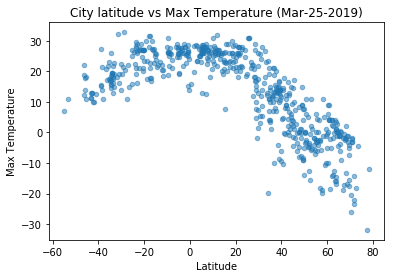

In [121]:
weather_data.plot(x='Latitude',y = 'Max Temperature', kind = 'scatter', marker = 'o', alpha = 0.5, title='City latitude vs Max Temperature (' + record_date + ')')
plt.savefig('Maxtemp_latitude.png')

#### Latitude vs. Humidity Plot

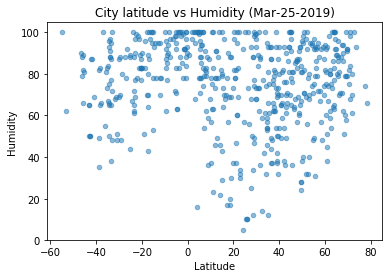

In [122]:
weather_data.plot(x='Latitude',y = 'Humidity', kind = 'scatter', marker = 'o', alpha = 0.5, title='City latitude vs Humidity (' + record_date + ')')

plt.savefig('Humidity_latitude.png')

#### Latitude vs. Cloudiness Plot

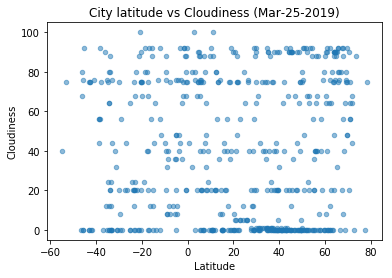

In [123]:
weather_data.plot(x='Latitude',y = 'Cloudiness', kind = 'scatter',marker = 'o', alpha = 0.5, title='City latitude vs Cloudiness ('+ record_date + ')')
plt.savefig('Cloudiness_latitude.png')

#### Latitude vs. Wind Speed Plot

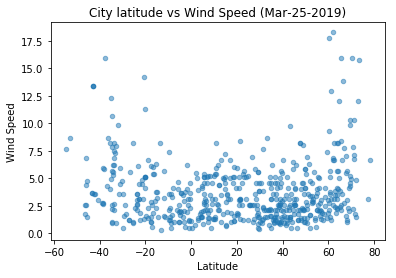

In [124]:
weather_data.plot(x='Latitude',y = 'Wind Speed', kind = 'scatter', marker = 'o', alpha = 0.5, title='City latitude vs Wind Speed (' + record_date + ')')
plt.savefig('WindSpeed_latitude.png')